# Predicting success of Bank Telemarketing Calls: Implementing and Comparing various ML classification algorithms

### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import seaborn as sns


# Exploratory Data Analysis 

In [3]:
df_baf=pd.read_csv('bank-additional-full.csv',sep=';')
df_baf.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
df_baf.isnull().sum()
# The function dataframe.isnull().sum() returns the number of missing values in the data set. 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
print(df_baf["job"].value_counts())
print("*"*25)
print(df_baf["marital"].value_counts())
print("*"*25)
print(df_baf["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [6]:
print(df_baf["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [7]:
df_baf.shape


(41188, 21)

The Overview consists of overall statistics. This includes the number of variables (features or columns of the dataframe), Number of observations (rows of dataframe), Missing cells,  percentage of missing cells, Duplicate rows, percentage of duplicate rows, and Total size in memory.
The alerts tab consists of any type of warnings related to cardinality, correlation with other variables, missing values, zeroes, skewness of the variables, and many others.
The reproduction tab simply displays information related to the report generation. It shows the start and ends the time of the analysis, the time taken to generate the report, the software version of pandas profiling, and a configuration download option.
Correlation is used to describe the degree to which two variables move in coordination with one another. In the pandas profiling report, you can access 5 types of correlation coefficients: Pearson’s r, Spearman’s ρ, Kendall’s τ, Phik (φk), and Cramér’s V (φc).


# Distribution of class variable:
First we will look into the class distribution to see if it is a balanced data or not.


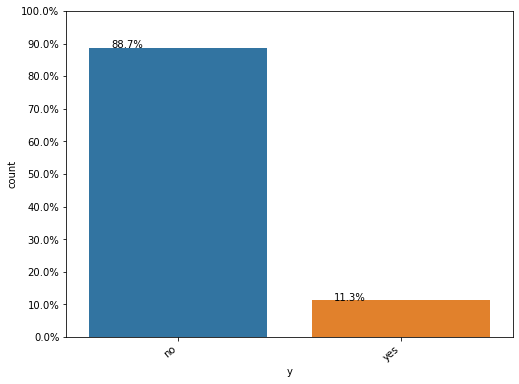

In [8]:
%matplotlib inline
plt.figure(figsize=(8,6))
Y = df_baf["y"]
total = len(Y)*1.
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
ax=sns.countplot(x="y", data=df_baf)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

We can see from the above plot that the dataset in imbalanced, where the number of negative 
class is close to 8 times the number of positive class.
Now we will do some Univariate analysis which is taking one feature at a time 
and checking how well it can distinguish between the two classes.
For example, one of the features in our dataset is “Job” of the customer. 
We will see the distribution to find out if there is any specific category
for this feature which subscribes to a term deposit more than other categories.

In [9]:
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    Y = df_baf[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()


    
  

In [10]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = df_baf[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label,data=dataset,hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
     #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()
    



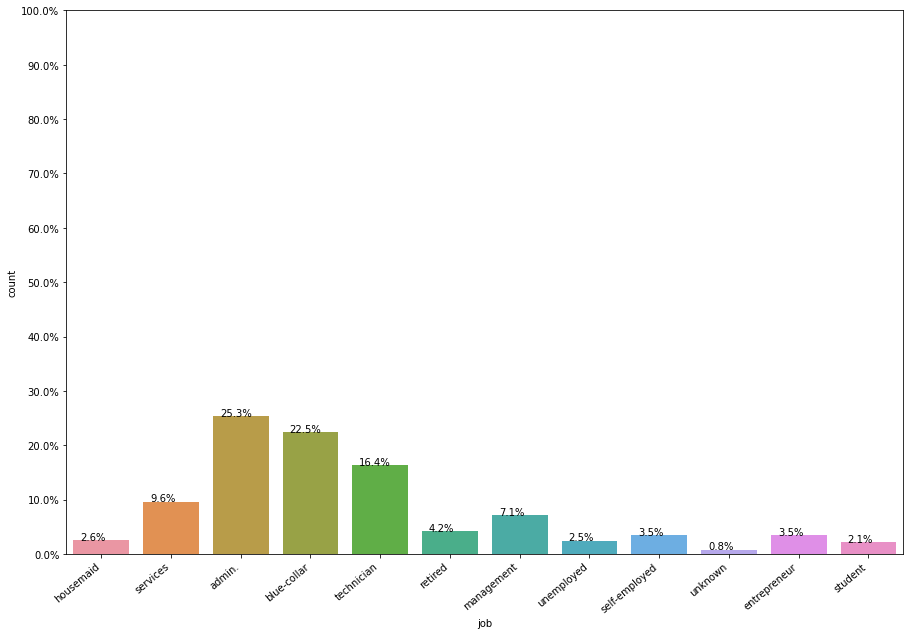

In [11]:
countplot("job", df_baf)

From the above distribution we can see that most of the customers have jobs as
"admin", "blue-collar" or "technician". 
One interesting thing to find out would be to see the distribution 
for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

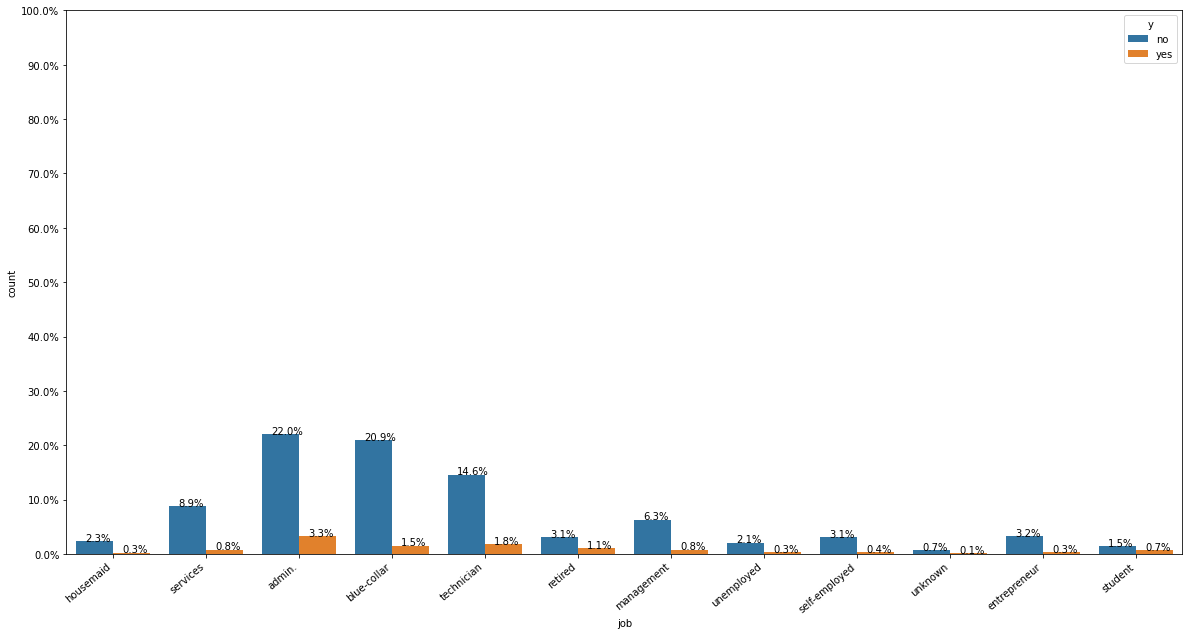

In [12]:
countplot_withY("job", df_baf)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

Idea: If we find that odds of one profession subscribing is greater than other job, we can use the odds or log(odds) as a feature by replacing jobs field with the odds, instead of doing one hot encoding.

Feature: Marital (Categorical feature)

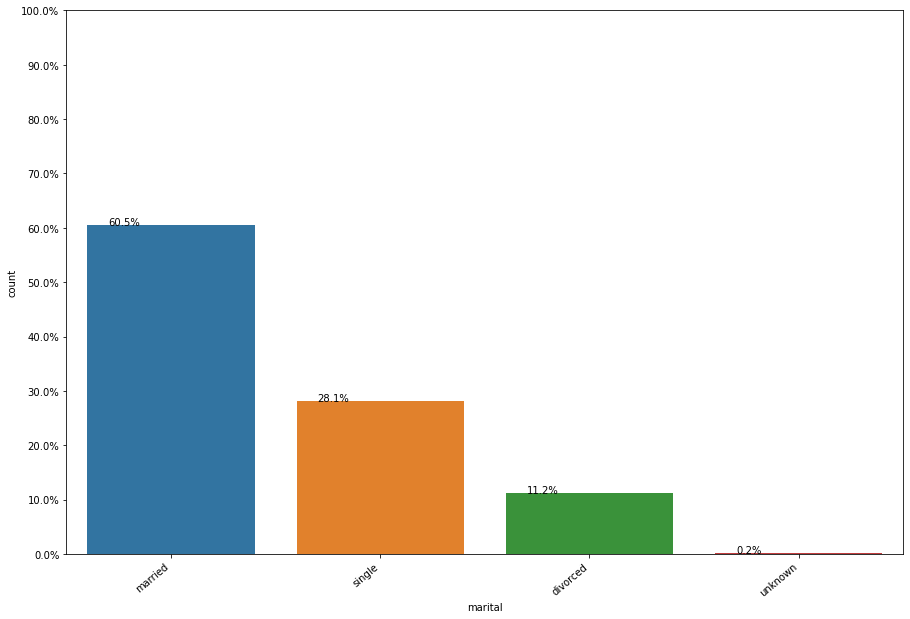

In [13]:
countplot("marital", df_baf)

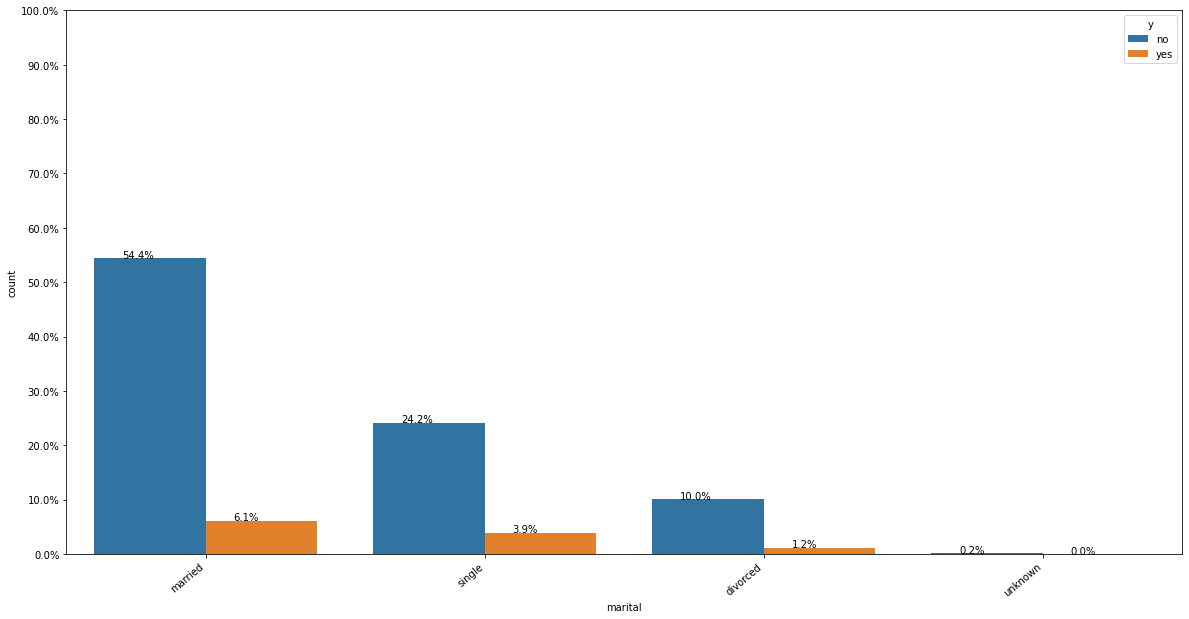

In [14]:
countplot_withY("marital", df_baf)

Feature: default (categorical)
This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

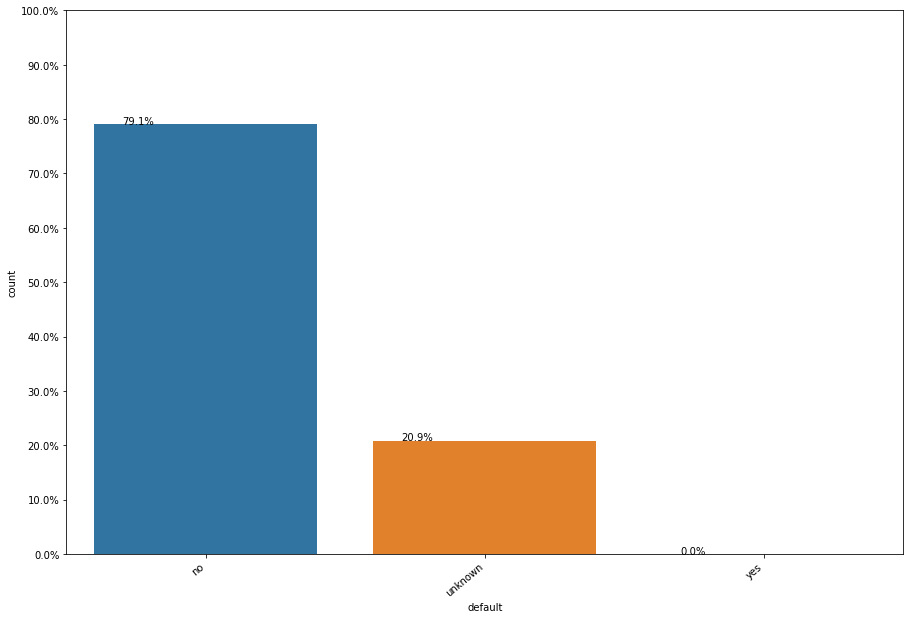

In [15]:
countplot("default", df_baf)

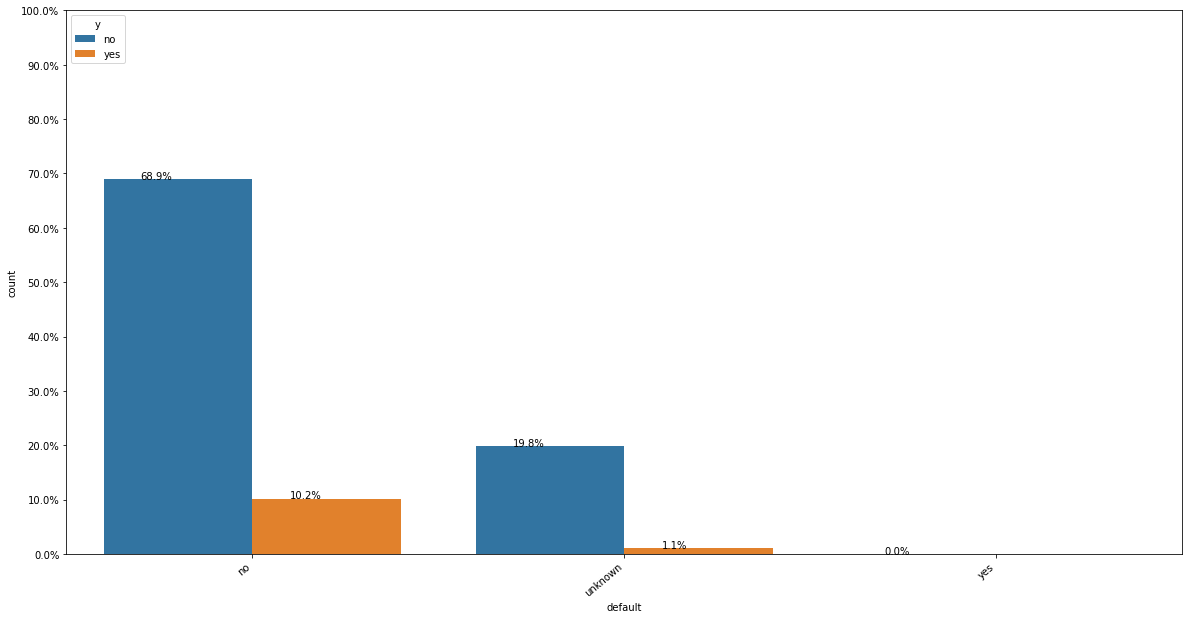

In [16]:
countplot_withY("default", df_baf)

There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

Feature: Education

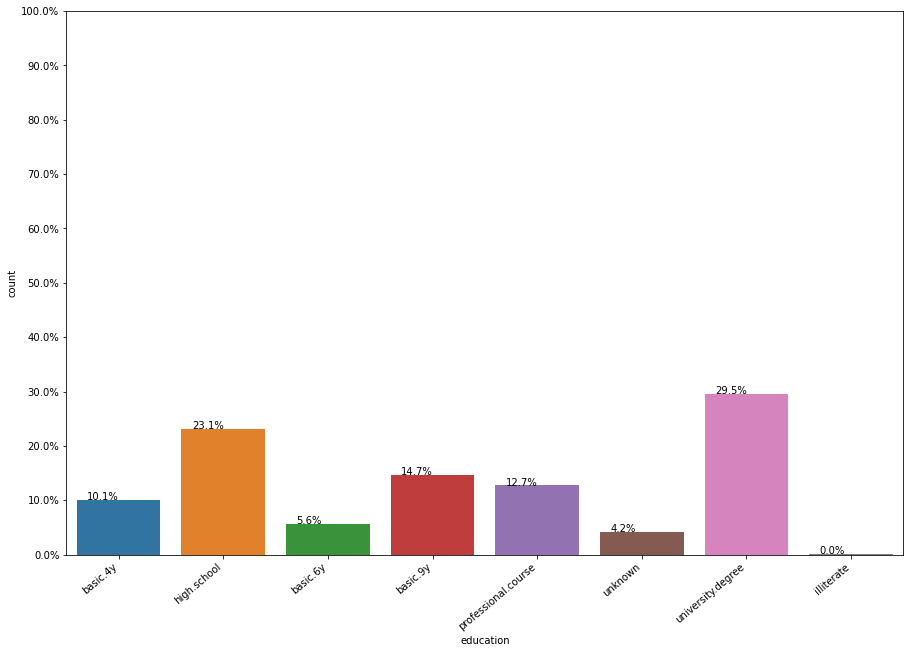

In [17]:
countplot("education",df_baf)

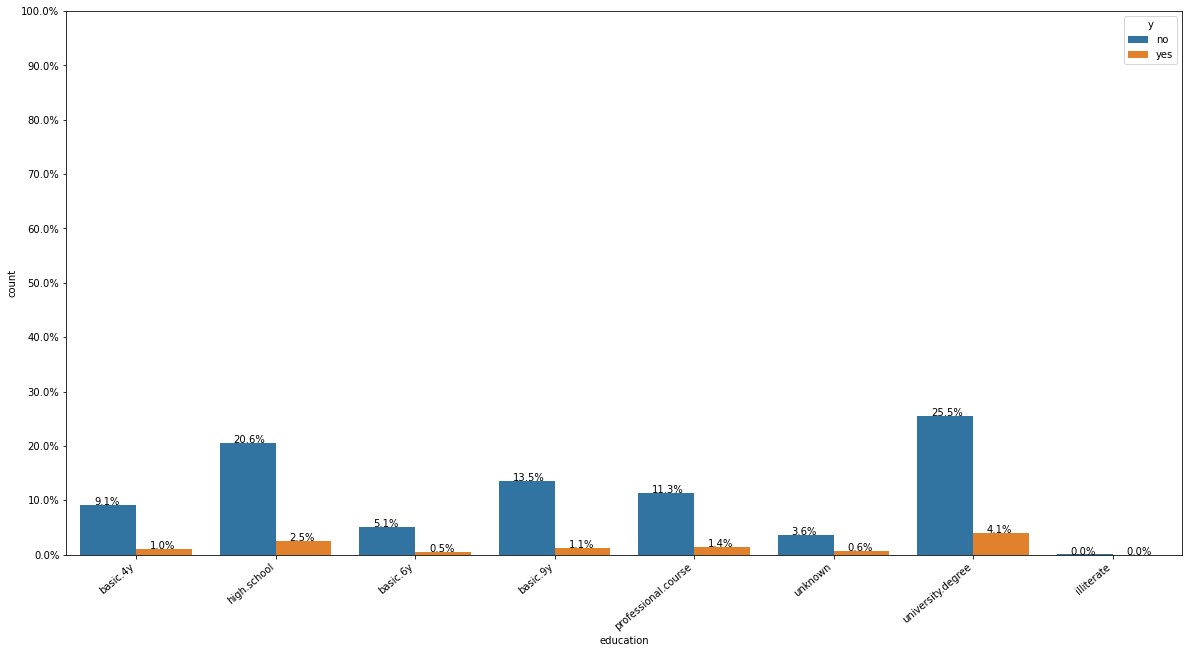

In [18]:
countplot_withY("education", df_baf)

Feature: housing (Categorical)

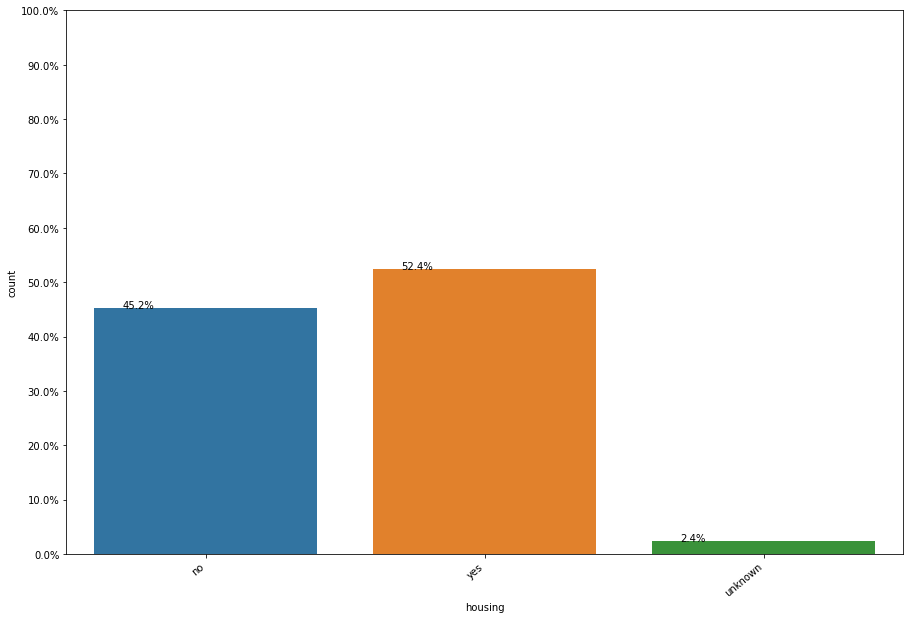

In [19]:
countplot("housing", df_baf)

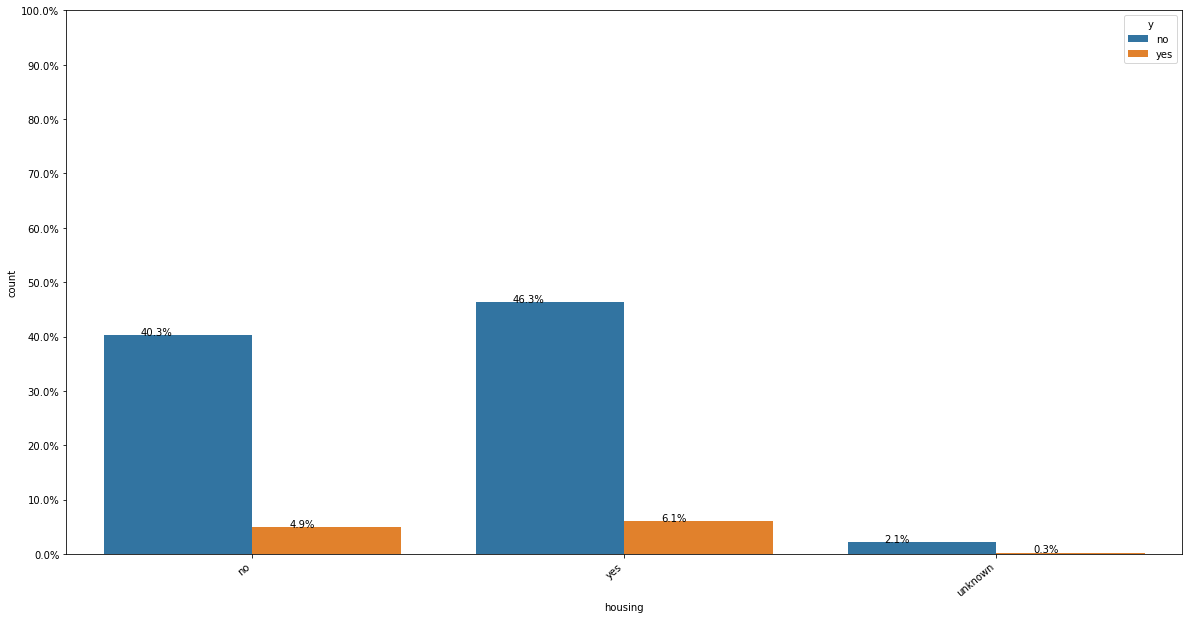

In [20]:
countplot_withY("housing", df_baf)

Feature: loan (Categorical)

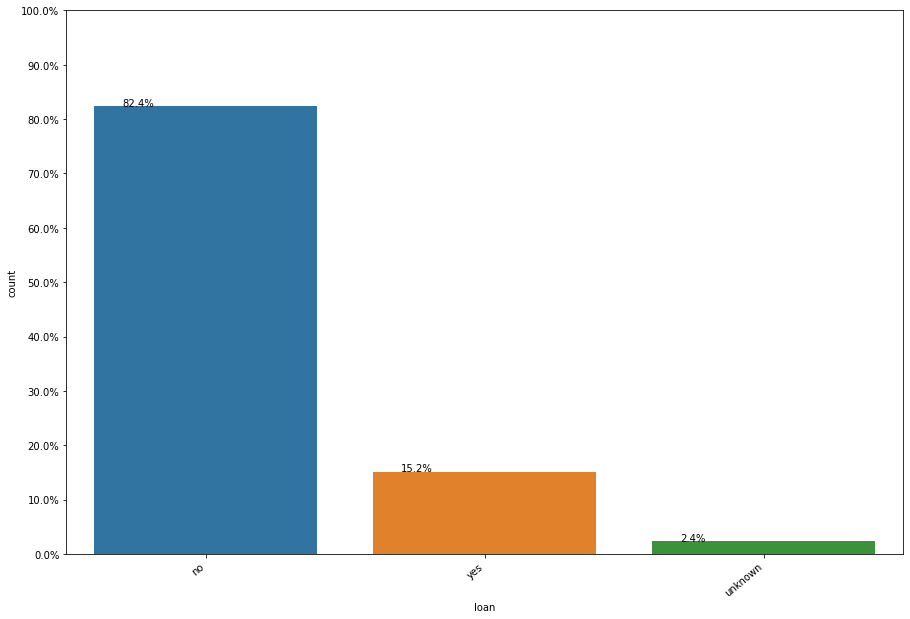

In [21]:
countplot("loan", df_baf)

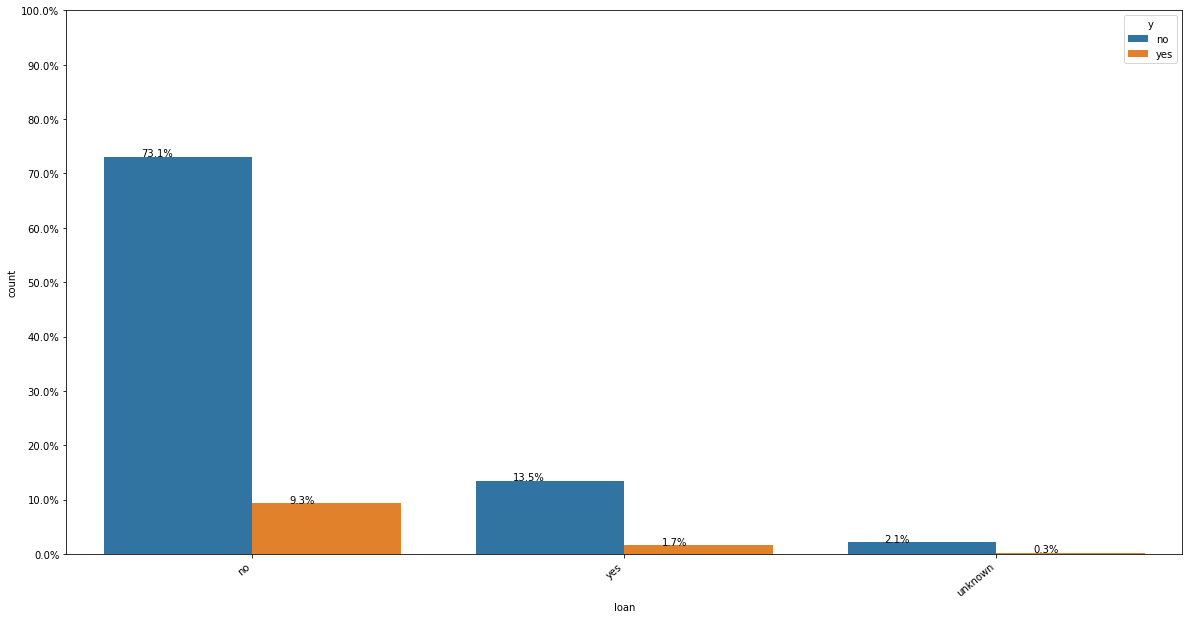

In [22]:
countplot_withY("loan", df_baf)

Feature: contact (Categorical)

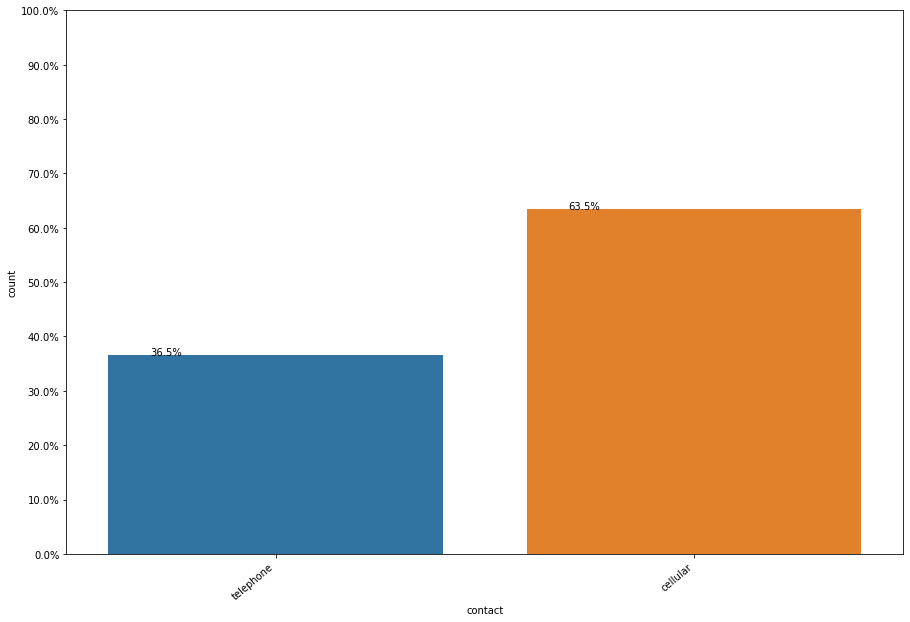

In [23]:
countplot("contact", df_baf)

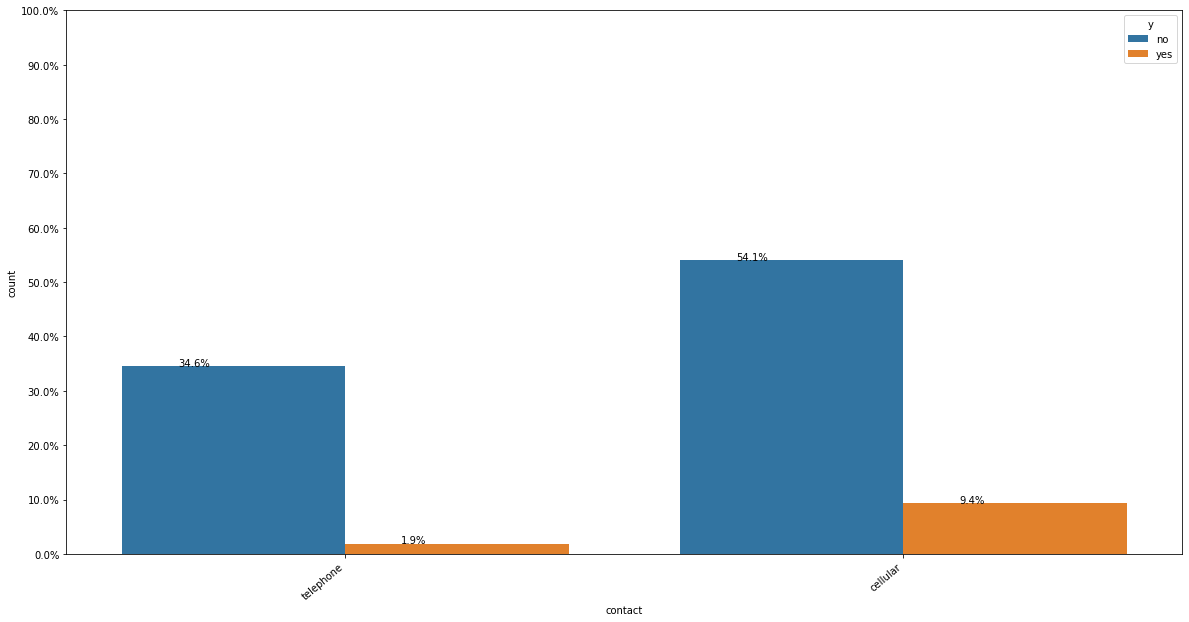

In [24]:
countplot_withY("contact", df_baf)

Feature: month (Categorical)

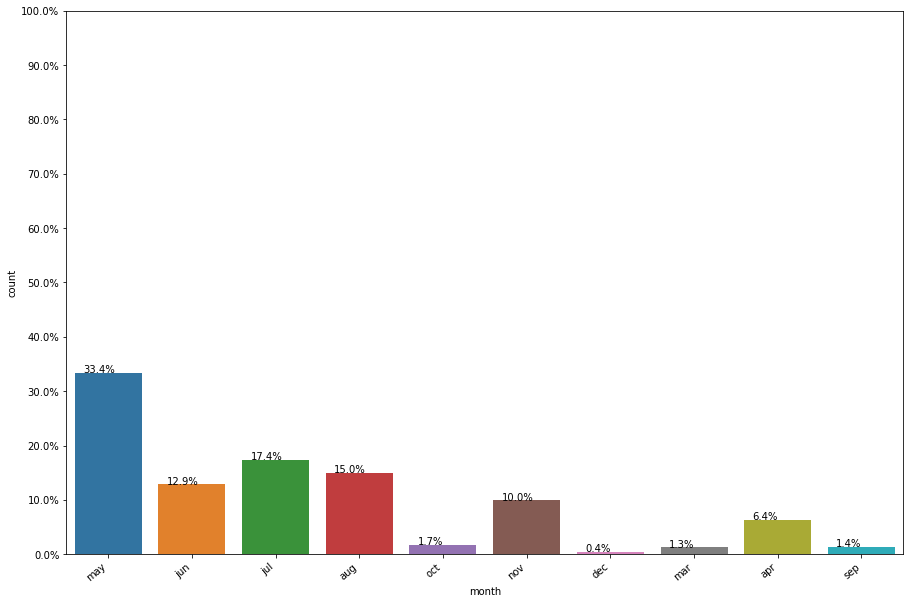

In [25]:
countplot("month", df_baf)

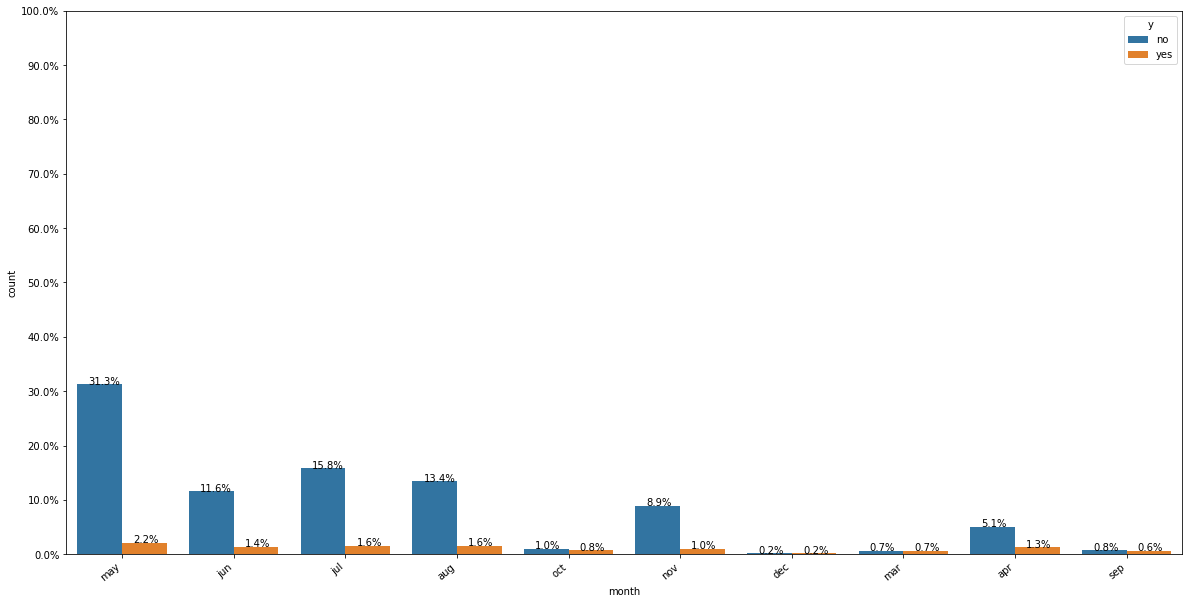

In [26]:
countplot_withY("month", df_baf)

Feature: day_of_week (Categorical)

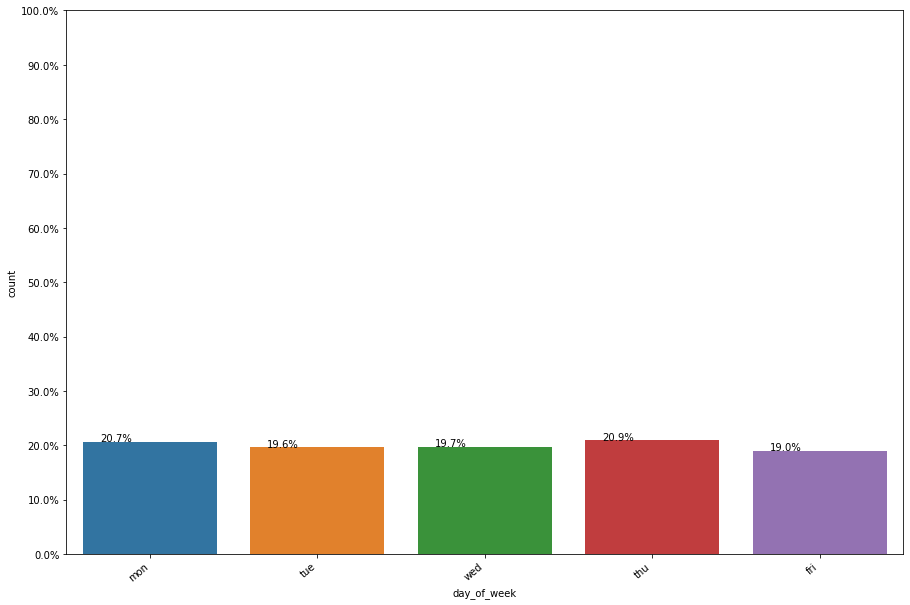

In [27]:
countplot("day_of_week", df_baf)

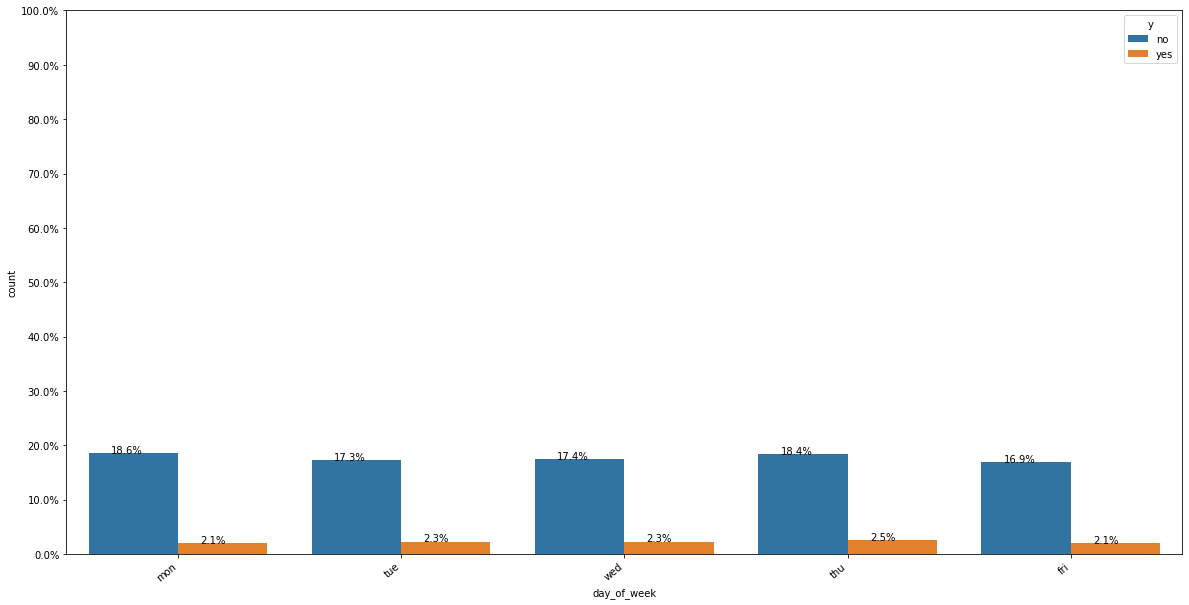

In [28]:
countplot_withY("day_of_week", df_baf)

The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same.

Feature: poutcome (Categorical)
This feature indicates the outcome of the previous marketing campaign

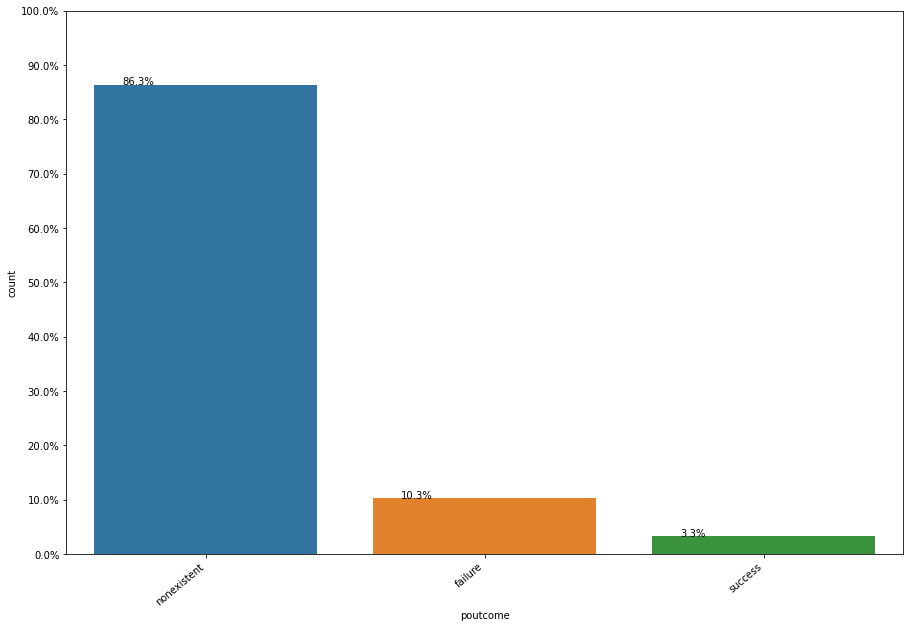

In [29]:
countplot("poutcome", df_baf)

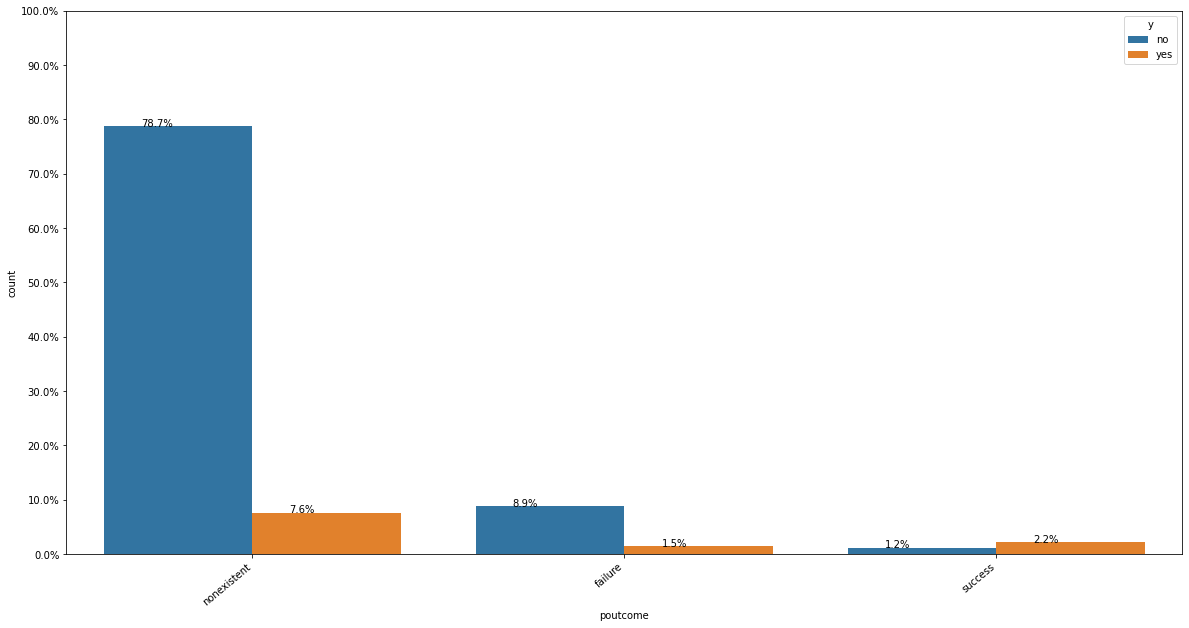

In [30]:
countplot_withY("poutcome", df_baf)


Feature: Age (Numeric)

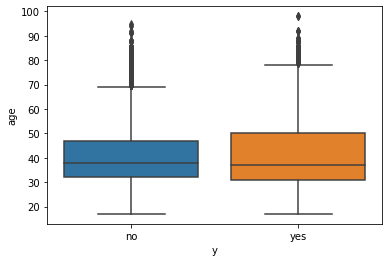

In [31]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

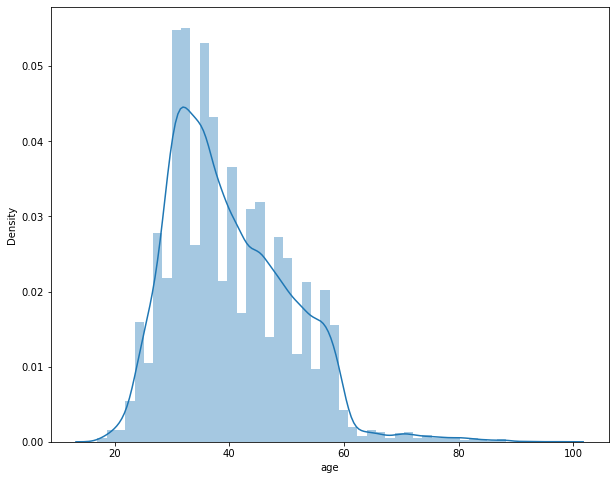

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df_baf["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

Feature: duration (numeric)

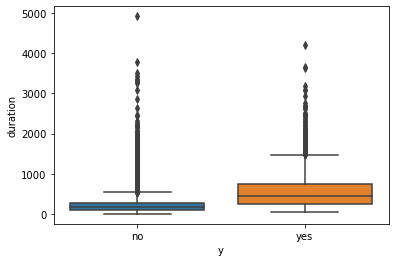

In [33]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="duration")
plt.show()

Duration: Now this feature is very interesting in our case study. It denotes the duration of the last contact, in seconds. It is mentioned in the source of the dataset:
Important note: This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


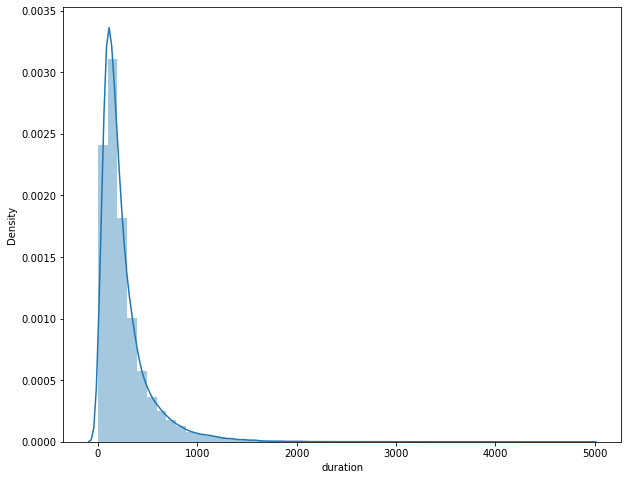

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df_baf["duration"])
plt.show()

This seems like a powerlaw distribution where most the values are very low and very few have high values.

Feature: campaign (numeric)

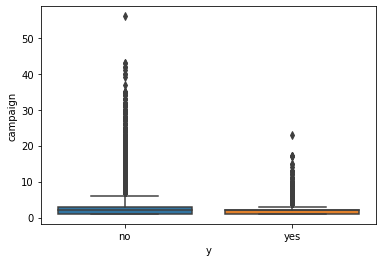

In [35]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="campaign")
plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


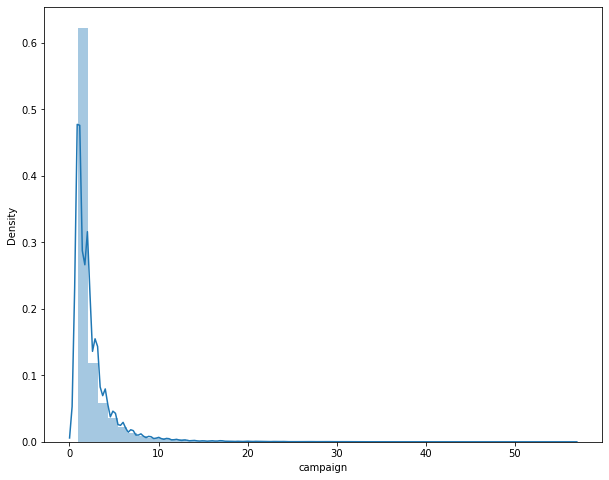

In [36]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["campaign"])
plt.show()

Feature: pdays (numeric)

In [37]:
df_baf["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [38]:
df_baf["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

In [39]:
df_baf["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [40]:
df_baf["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [41]:
df_baf[df_baf["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [42]:
df_baf[df_baf["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

emp.var.rate
 Employment variation rate, quarterly indicator

In [43]:
df_baf["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

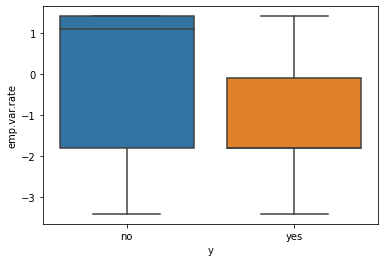

In [44]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="emp.var.rate")
plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


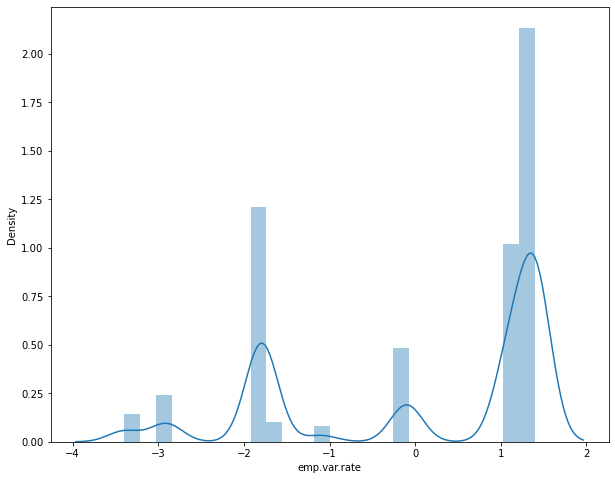

In [45]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["emp.var.rate"])
plt.show()

cons.price.idx
consumer confidence index — monthly indicator (numeric)

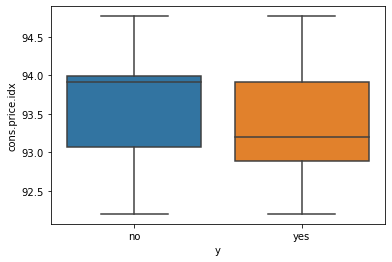

In [46]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="cons.price.idx")
plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


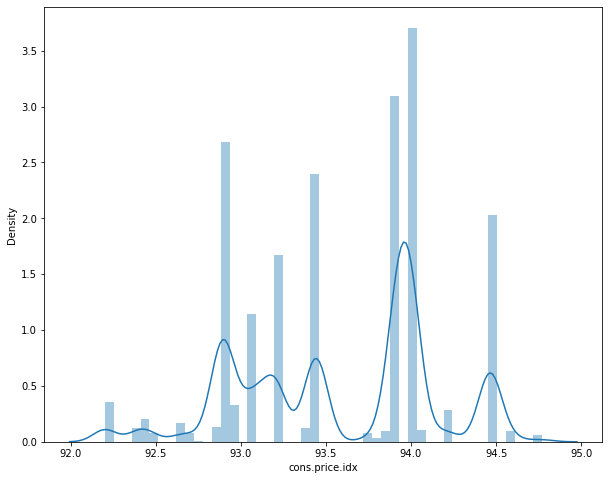

In [47]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["cons.price.idx"])
plt.show()

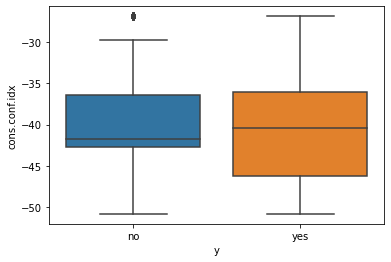

In [48]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="cons.conf.idx")
plt.show()
#consumer confidence index — monthly indicator (numeric)

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


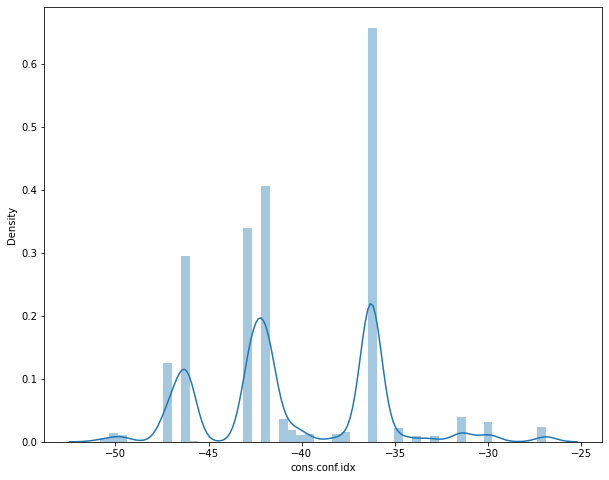

In [49]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["cons.conf.idx"])
plt.show()

euribor3m: euribor 3 month rate — daily indicator (numeric)
euribor 3 month rate, daily indicator. The euribor denotes the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.

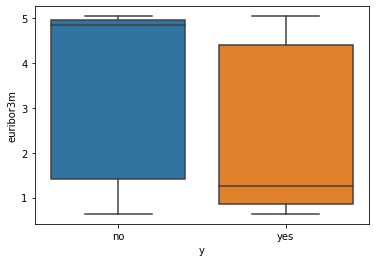

In [50]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="euribor3m")
plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


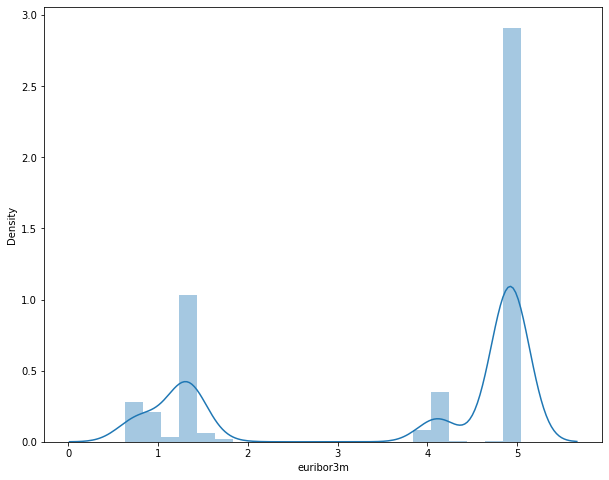

In [51]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["euribor3m"])
plt.show()

nr.employed: number of employees — quarterly indicator (numeric)

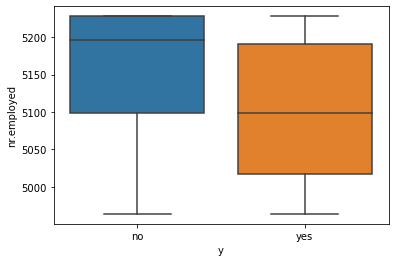

In [52]:
%matplotlib inline
sns.boxplot(data=df_baf, x="y", y="nr.employed")
plt.show()


C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


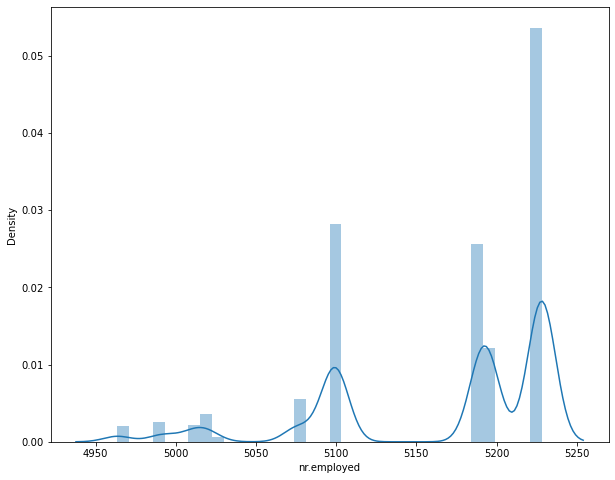

In [53]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_baf["nr.employed"])
plt.show()

Correlation Matrix of the numerical features:
Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. This can be a very useful tool to quickly check which features are more correlated and which pair of features are not.

Text(0.5, 1.05, 'Pearson correlation of Features')

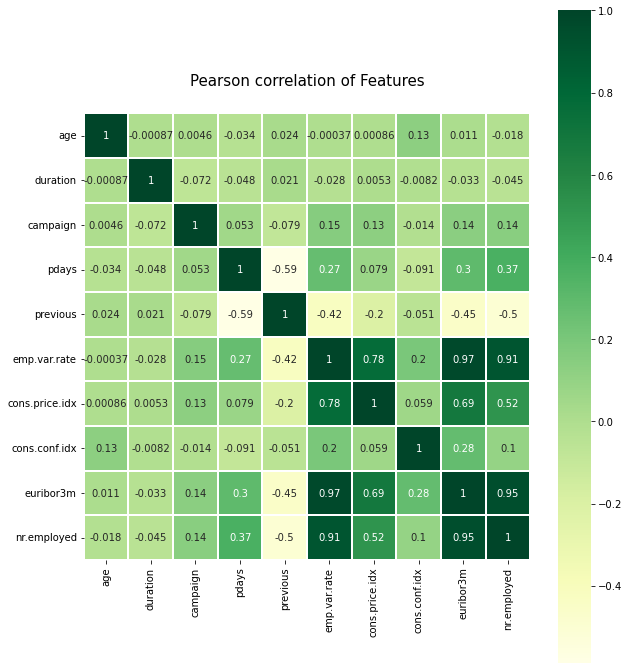

In [54]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = df_baf.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

The Overview consists of overall statistics. This includes the number of variables (features or columns of the dataframe), Number of observations (rows of dataframe), Missing cells, percentage of missing cells, Duplicate rows, percentage of duplicate rows, and Total size in memory. The alerts tab consists of any type of warnings related to cardinality, correlation with other variables, missing values, zeroes, skewness of the variables, and many others. The reproduction tab simply displays information related to the report generation. It shows the start and ends the time of the analysis, the time taken to generate the report, the software version of pandas profiling, and a configuration download option. Correlation is used to describe the degree to which two variables move in coordination with one another. In the pandas profiling report, you can access 5 types of correlation coefficients: Pearson’s r, Spearman’s ρ, Kendall’s τ, Phik (φk), and Cramér’s V (φc).

In [55]:
profile = pp.ProfileReport(df_baf)
# It offers report generation for the dataset with lots of features and customizations for the report generated
profile.to_file("bank-additional-full-profileoutput_ydupl.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df_bafd=df_baf.drop(['euribor3m','nr.employed'],axis=1) #dropping correlated features
df_bafd.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx   y  
0           1.1          93.994          -36.4  no  
1           1.1          93.994          -36.4  no  
2           1.1          93.994          -36.4  no  
3           1.1          93.994          -36.4  no  
4           1.1          93.994          -36.4  no

# Applying Logistic Regression


## 1. Converting Categorical Data to numerical

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_bafd, test_size=0.2)
train.shape,test.shape

((32950, 19), (8238, 19))

In [58]:
c1=train.iloc[:,1:10] #first set of categorical variables
c1.head(5) 

job   marital            education  default housing loan  \
10795      housemaid   married    university.degree       no     yes   no   
1150     blue-collar   married             basic.9y  unknown      no   no   
13091         admin.  divorced    university.degree  unknown      no   no   
955       technician   married  professional.course       no      no   no   
6496   self-employed    single    university.degree       no      no   no   

         contact month day_of_week  
10795  telephone   jun         tue  
1150   telephone   may         thu  
13091   cellular   jul         tue  
955    telephone   may         wed  
6496   telephone   may         wed

In [59]:
c2=train.iloc[:,14:15] #second set of categorical variable
c2.head(5) 

poutcome
10795  nonexistent
1150   nonexistent
13091  nonexistent
955    nonexistent
6496   nonexistent

In [60]:
c1 = c1.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1.head()

job  marital  education  default  housing  loan  contact  month  \
10795    3        1          6        0        2     0        1      4   
1150     1        1          2        1        0     0        1      6   
13091    0        0          6        1        0     0        0      3   
955      9        1          5        0        0     0        1      6   
6496     6        2          6        0        0     0        1      6   

       day_of_week  
10795            3  
1150             2  
13091            3  
955              4  
6496             4

In [61]:
c2 = c2.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c2.head()

poutcome
10795         1
1150          1
13091         1
955           1
6496          1

In [62]:
c3=train.iloc[:,-1:] #predicted variable
c3.head()

y
10795  no
1150   no
13091  no
955    no
6496   no

In [63]:
c3=c3.astype('category').apply(lambda x: x.cat.codes) #converting to numeric from categorical
#Lambda functions are defined using the keyword lambda. 
#They can have any number of arguments but only one expression. 
#A lambda function cannot contain any statements, and it returns a function object which can be assigned to any variable.
#They are generally used for one-line expressions.
c3.head()

y
10795  0
1150   0
13091  0
955    0
6496   0

In [64]:
train_num=pd.concat([train.iloc[:,0:1],c1,train.iloc[:,10:14],c2,train.iloc[:,15:18],c3],axis=1)
train_num.head()

age  job  marital  education  default  housing  loan  contact  month  \
10795   55    3        1          6        0        2     0        1      4   
1150    50    1        1          2        1        0     0        1      6   
13091   52    0        0          6        1        0     0        0      3   
955     29    9        1          5        0        0     0        1      6   
6496    25    6        2          6        0        0     0        1      6   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
10795            3       441         3    999         0         1   
1150             2        77         2    999         0         1   
13091            3       210         2    999         0         1   
955              4       125         2    999         0         1   
6496             4       199         2    999         0         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  y  
10795           1.4          94.465          -41.8  0  
1150            1.1          93.994          -36.4  0  
13091           1.4          93.918          -42.7  0  
955             1.1          93.994          -36.4  0  
6496            1.1          93.994          -36.4  0

In [65]:
c1t=test.iloc[:,1:10] #first set of categorical variables test
c1t.head(5) 

job   marital            education default housing loan  \
12185       retired  divorced    university.degree      no      no   no   
31130   blue-collar   married  professional.course      no     yes   no   
24841   blue-collar    single             basic.9y      no      no   no   
11496  entrepreneur    single          high.school      no     yes   no   
31025   blue-collar   married             basic.9y      no     yes   no   

         contact month day_of_week  
12185  telephone   jul         tue  
31130   cellular   may         wed  
24841   cellular   nov         tue  
11496  telephone   jun         fri  
31025  telephone   may         tue

In [66]:
c2t=test.iloc[:,14:15] #second set of categorical variable test
c2t.head(5) 

poutcome
12185  nonexistent
31130  nonexistent
24841  nonexistent
11496  nonexistent
31025  nonexistent

In [67]:
c1t = c1t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1t.head()

job  marital  education  default  housing  loan  contact  month  \
12185    5        0          6        0        0     0        1      3   
31130    1        1          5        0        2     0        0      6   
24841    1        2          2        0        0     0        0      7   
11496    2        2          3        0        2     0        1      4   
31025    1        1          2        0        2     0        1      6   

       day_of_week  
12185            3  
31130            4  
24841            3  
11496            0  
31025            3

In [68]:
c2t = c2t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
c2t.head()

poutcome
12185         1
31130         1
24841         1
11496         1
31025         1

In [69]:
ytest=test.iloc[:,-1:] #predicted variable of test
ytest.head()

y
12185  no
31130  no
24841  no
11496  no
31025  no

In [70]:
ytest_num = ytest.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
ytest_num.head()

y
12185  0
31130  0
24841  0
11496  0
31025  0

In [71]:
test_num=pd.concat([test.iloc[:,0:1],c1t,test.iloc[:,10:14],c2t,test.iloc[:,15:18]],axis=1)
test_num.head()

age  job  marital  education  default  housing  loan  contact  month  \
12185   57    5        0          6        0        0     0        1      3   
31130   39    1        1          5        0        2     0        0      6   
24841   31    1        2          2        0        0     0        0      7   
11496   24    2        2          3        0        2     0        1      4   
31025   36    1        1          2        0        2     0        1      6   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
12185            3       156         2    999         0         1   
31130            4       145         1    999         0         1   
24841            3        58         1    999         0         1   
11496            0       113         1    999         0         1   
31025            3       399         2    999         0         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  
12185           1.4          93.918          -42.7  
31130          -1.8          92.893          -46.2  
24841          -0.1          93.200          -42.0  
11496           1.4          94.465          -41.8  
31025          -1.8          92.893          -46.2

## 2. Generating Model from Training Data

In [72]:
trd=train_num.iloc[:,:].T #train data
trd

10795    1150     13091    955      6496   24360    9615   \
age              55.000   50.000   52.000   29.000   25.000   44.0   35.000   
job               3.000    1.000    0.000    9.000    6.000    7.0    0.000   
marital           1.000    1.000    0.000    1.000    2.000    0.0    1.000   
education         6.000    2.000    6.000    5.000    6.000    3.0    3.000   
default           0.000    1.000    1.000    0.000    0.000    0.0    0.000   
housing           2.000    0.000    0.000    0.000    0.000    2.0    0.000   
loan              0.000    0.000    0.000    0.000    0.000    2.0    0.000   
contact           1.000    1.000    0.000    1.000    1.000    0.0    1.000   
month             4.000    6.000    3.000    6.000    6.000    7.0    4.000   
day_of_week       3.000    2.000    3.000    4.000    4.000    1.0    1.000   
duration        441.000   77.000  210.000  125.000  199.000  164.0  250.000   
campaign          3.000    2.000    2.000    2.000    2.000    1.0    1.000   
pdays           999.000  999.000  999.000  999.000  999.000  999.0  999.000   
previous          0.000    0.000    0.000    0.000    0.000    0.0    0.000   
poutcome          1.000    1.000    1.000    1.000    1.000    1.0    1.000   
emp.var.rate      1.400    1.100    1.400    1.100    1.100   -0.1    1.400   
cons.price.idx   94.465   93.994   93.918   93.994   93.994   93.2   94.465   
cons.conf.idx   -41.800  -36.400  -42.700  -36.400  -36.400  -42.0  -41.800   
y                 0.000    0.000    0.000    0.000    0.000    0.0    0.000   

                  32763     31648    5181   ...    1737     14144    5374   \
age              44.000    32.000   41.000  ...   36.000   33.000   47.000   
job               0.000     0.000    7.000  ...   10.000    9.000    0.000   
marital           2.000     2.000    1.000  ...    2.000    0.000    1.000   
education         5.000     5.000    3.000  ...    0.000    5.000    6.000   
default           0.000     0.000    0.000  ...    1.000    0.000    0.000   
housing           2.000     2.000    0.000  ...    0.000    2.000    2.000   
loan              0.000     2.000    0.000  ...    0.000    0.000    0.000   
contact           0.000     0.000    1.000  ...    1.000    0.000    1.000   
month             6.000     6.000    6.000  ...    6.000    3.000    6.000   
day_of_week       1.000     2.000    0.000  ...    0.000    1.000    0.000   
duration        105.000  1046.000  911.000  ...  544.000   72.000  138.000   
campaign          3.000     1.000    2.000  ...    1.000    4.000    6.000   
pdays           999.000   999.000  999.000  ...  999.000  999.000  999.000   
previous          0.000     0.000    0.000  ...    0.000    0.000    0.000   
poutcome          1.000     1.000    1.000  ...    1.000    1.000    1.000   
emp.var.rate     -1.800    -1.800    1.100  ...    1.100    1.400    1.100   
cons.price.idx   92.893    92.893   93.994  ...   93.994   93.918   93.994   
cons.conf.idx   -46.200   -46.200  -36.400  ...  -36.400  -42.700  -36.400   
y                 0.000     1.000    0.000  ...    0.000    0.000    0.000   

                  14200    33480  27081    23880    39323    23149    32501  
age              29.000   45.000   53.0   31.000   30.000   48.000   44.000  
job               4.000    1.000    6.0    9.000    9.000    7.000    1.000  
marital           2.000    1.000    1.0    0.000    3.000    1.000    1.000  
education         6.000    1.000    6.0    6.000    6.000    0.000    0.000  
default           0.000    0.000    0.0    0.000    0.000    1.000    1.000  
housing           2.000    2.000    2.0    0.000    0.000    2.000    0.000  
loan              0.000    0.000    0.0    2.000    0.000    0.000    0.000  
contact           0.000    1.000    0.0    0.000    0.000    0.000    0.000  
month             3.000    6.000    7.0    1.000    5.000    1.000    6.000  
day_of_week       1.000    3.000    0.0    0.000    1.000    3.000    0.000  
duration        13

In [73]:
X=[]
col=trd.shape[0]-1
for i in range(col):
    X.append(trd.iloc[i].values)
X.append(np.ones(trd.shape[1]))
X=np.array(X)
X

array([[ 55.   ,  50.   ,  52.   , ...,  30.   ,  48.   ,  44.   ],
       [  3.   ,   1.   ,   0.   , ...,   9.   ,   7.   ,   1.   ],
       [  1.   ,   1.   ,   0.   , ...,   3.   ,   1.   ,   1.   ],
       ...,
       [ 94.465,  93.994,  93.918, ...,  93.369,  93.444,  92.893],
       [-41.8  , -36.4  , -42.7  , ..., -34.8  , -36.1  , -46.2  ],
       [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])

In [74]:
featurelen=trd.shape[0]
observationlen=trd.shape[1]
featurelen

19

In [75]:
y=trd.iloc[-1].values
y=np.asmatrix(y)
y

matrix([[0., 0., 0., ..., 1., 0., 0.]])

In [76]:
m=observationlen

In [77]:
theta=np.matrix([np.zeros(featurelen)])
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [78]:
test_num.head()

age  job  marital  education  default  housing  loan  contact  month  \
12185   57    5        0          6        0        0     0        1      3   
31130   39    1        1          5        0        2     0        0      6   
24841   31    1        2          2        0        0     0        0      7   
11496   24    2        2          3        0        2     0        1      4   
31025   36    1        1          2        0        2     0        1      6   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
12185            3       156         2    999         0         1   
31130            4       145         1    999         0         1   
24841            3        58         1    999         0         1   
11496            0       113         1    999         0         1   
31025            3       399         2    999         0         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  
12185           1.4          93.918          -42.7  
31130          -1.8          92.893          -46.2  
24841          -0.1          93.200          -42.0  
11496           1.4          94.465          -41.8  
31025          -1.8          92.893          -46.2

In [79]:
tsd=test_num.iloc[:,:].T #test data
tsd

12185    31130  24841    11496    31025    10807    12605  \
age              57.000   39.000   31.0   24.000   36.000   43.000   50.000   
job               5.000    1.000    1.0    2.000    1.000    9.000    9.000   
marital           0.000    1.000    2.0    2.000    1.000    2.000    1.000   
education         6.000    5.000    2.0    3.000    2.000    5.000    5.000   
default           0.000    0.000    0.0    0.000    0.000    0.000    0.000   
housing           0.000    2.000    0.0    2.000    2.000    1.000    0.000   
loan              0.000    0.000    0.0    0.000    0.000    1.000    0.000   
contact           1.000    0.000    0.0    1.000    1.000    1.000    0.000   
month             3.000    6.000    7.0    4.000    6.000    4.000    3.000   
day_of_week       3.000    4.000    3.0    0.000    3.000    4.000    1.000   
duration        156.000  145.000   58.0  113.000  399.000   35.000  830.000   
campaign          2.000    1.000    1.0    1.000    2.000    3.000    5.000   
pdays           999.000  999.000  999.0  999.000  999.000  999.000  999.000   
previous          0.000    0.000    0.0    0.000    0.000    0.000    0.000   
poutcome          1.000    1.000    1.0    1.000    1.000    1.000    1.000   
emp.var.rate      1.400   -1.800   -0.1    1.400   -1.800    1.400    1.400   
cons.price.idx   93.918   92.893   93.2   94.465   92.893   94.465   93.918   
cons.conf.idx   -42.700  -46.200  -42.0  -41.800  -46.200  -41.800  -42.700   

                  40199     4268     20252  ...    38875    15511    4372   \
age              56.000    47.000   46.000  ...   32.000   47.000   51.000   
job              10.000     1.000    1.000  ...    9.000    0.000    0.000   
marital           0.000     1.000    1.000  ...    1.000    2.000    1.000   
education         0.000     7.000    2.000  ...    6.000    6.000    1.000   
default           0.000     1.000    1.000  ...    0.000    0.000    1.000   
housing           2.000     0.000    0.000  ...    2.000    0.000    0.000   
loan              0.000     0.000    0.000  ...    0.000    2.000    0.000   
contact           0.000     1.000    0.000  ...    0.000    1.000    1.000   
month             3.000     6.000    1.000  ...    7.000    3.000    6.000   
day_of_week       1.000     3.000    1.000  ...    1.000    0.000    3.000   
duration        187.000  1334.000  109.000  ...   77.000  183.000  253.000   
campaign          6.000     1.000    1.000  ...    1.000    9.000    1.000   
pdays           999.000   999.000  999.000  ...  999.000  999.000  999.000   
previous          0.000     0.000    0.000  ...    0.000    0.000    0.000   
poutcome          1.000     1.000    1.000  ...    1.000    1.000    1.000   
emp.var.rate     -1.700     1.100    1.400  ...   -3.400    1.400    1.100   
cons.price.idx   94.215    93.994   93.444  ...   92.649   93.918   93.994   
cons.conf.idx   -40.300   -36.400  -36.100  ...  -30.100  -42.700  -36.400   

                  21722    15027    32208    9567     21752    15617    33620  
age              34.000   40.000   35.000   29.000   48.000   52.000   38.000  
job               0.000    7.000    1.000    0.000    1.000    3.000    9.000  
marital           2.000    1.000    1.000    1.000    1.000    0.000    2.000  
education         6.000    2.000    1.000    3.000    2.000    2.000    5.000  
default           0.000    0.000    1.000    0.000    0.000    1.000    0.000  
housing           0.000    2.000    0.000    0.000    2.000    0.000    2.000  
loan              0.000    0.000    0.000    0.000    2.000    0.000    0.000  
contact           0.000    0.000    0.000    1.000    0.000    0.000    0.000  
month             1.000    3.000    6.000    4.000    1.000    3.000    6.000  
day_of_week       3.000    2.000    0.000    1.000    3.000    1.000    4.000  
duration        119.000  158.000  813.000  255.000  303.000  272.000   50.000  
campaign          6.000    1.000    1.000    1.000    3.000    2.000    2

### Applying Sklearn Logistic regression

In [80]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression().fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
ypredLR=modelLR.predict(test_num)

## Classification Metrics for sklearn LR

In [82]:
target_names = ['No', 'Yes']
print(classification_report(ytest_num, ypredLR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      7264
         Yes       0.63      0.36      0.46       974

    accuracy                           0.90      8238
   macro avg       0.77      0.67      0.70      8238
weighted avg       0.88      0.90      0.89      8238



In [83]:
#print(classification_report(ytest_num, finalout, target_names=target_names))

## APPLYING DECISION TREE CLASSIFIER

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtclf=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [86]:
dtclf.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Applying model on test

In [87]:
ypredDT=dtclf.predict(test_num)

## Classification Metrics for Decision Tree Classifier

In [88]:
print(classification_report(ytest_num,ypredDT,target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.93      0.93      7264
         Yes       0.51      0.51      0.51       974

    accuracy                           0.88      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.88      0.88      0.88      8238




## APPLYING NAIVE BAYES

In [89]:
gnb=GaussianNB()
gnb.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### Applying Model on Test

In [90]:
y_predNB=gnb.predict(test_num)

## Classification Metrics for Naive Bayes

In [91]:
print(classification_report(ytest_num,y_predNB,target_names= target_names))

              precision    recall  f1-score   support

          No       0.93      0.90      0.92      7264
         Yes       0.41      0.51      0.45       974

    accuracy                           0.86      8238
   macro avg       0.67      0.70      0.68      8238
weighted avg       0.87      0.86      0.86      8238



Macro avg - mean scores of all classess like marcr avg recall, macro avg precision
Weighted avg- summation of support * scores

# KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
knn = KNeighborsClassifier()
knn.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])
pred_knn = knn.predict(test_num)
print(test_num)
print(pred_knn)
print(classification_report(ytest_num, pred_knn,target_names=target_names))


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


       age  job  marital  education  default  housing  loan  contact  month  \
12185   57    5        0          6        0        0     0        1      3   
31130   39    1        1          5        0        2     0        0      6   
24841   31    1        2          2        0        0     0        0      7   
11496   24    2        2          3        0        2     0        1      4   
31025   36    1        1          2        0        2     0        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32208   35    1        1          1        1        0     0        0      6   
9567    29    0        1          3        0        0     0        1      4   
21752   48    1        1          2        0        2     2        0      1   
15617   52    3        0          2        1        0     0        0      3   
33620   38    9        2          5        0        2     0        0      6   

       day_of_week  duration  campaign  pdays  prev

# SVM

In [93]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])
pred_svm = svm.predict(test_num)
print(test_num)
print(pred_svm)
# print(metrics.accuracy_score(y_test, pred_svm)*100)
# print(confusion_matrix(y_test, pred_svm))
print(classification_report(ytest_num, pred_svm))

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


       age  job  marital  education  default  housing  loan  contact  month  \
12185   57    5        0          6        0        0     0        1      3   
31130   39    1        1          5        0        2     0        0      6   
24841   31    1        2          2        0        0     0        0      7   
11496   24    2        2          3        0        2     0        1      4   
31025   36    1        1          2        0        2     0        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32208   35    1        1          1        1        0     0        0      6   
9567    29    0        1          3        0        0     0        1      4   
21752   48    1        1          2        0        2     2        0      1   
15617   52    3        0          2        1        0     0        0      3   
33620   38    9        2          5        0        2     0        0      6   

       day_of_week  duration  campaign  pdays  prev

# SVM with Kernel

In [131]:
svm.n_support_
#svm.support_vectors_

array([3274, 3258])

In [94]:
#svm = SVC(kernel='rbf',probability=True)
svm_kernel = SVC(kernel='sigmoid',probability=True)
svm_kernel.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])
pred_svm_kernel =svm_kernel.predict(test_num)
print(test_num)
print(pred_svm_kernel)
# print(metrics.accuracy_score(y_test, pred_svm)*100)
# print(confusion_matrix(y_test, pred_svm))
print(classification_report(ytest_num, pred_svm_kernel))

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


       age  job  marital  education  default  housing  loan  contact  month  \
12185   57    5        0          6        0        0     0        1      3   
31130   39    1        1          5        0        2     0        0      6   
24841   31    1        2          2        0        0     0        0      7   
11496   24    2        2          3        0        2     0        1      4   
31025   36    1        1          2        0        2     0        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
32208   35    1        1          1        1        0     0        0      6   
9567    29    0        1          3        0        0     0        1      4   
21752   48    1        1          2        0        2     2        0      1   
15617   52    3        0          2        1        0     0        0      3   
33620   38    9        2          5        0        2     0        0      6   

       day_of_week  duration  campaign  pdays  prev

## Accuracy scores

### sklearn Logistic Regression

In [95]:
accuracy_score(ytest_num,ypredLR)

0.8992473901432386

### Naive Bayes' Classifier

In [96]:
accuracy_score(ytest_num,y_predNB)

0.8555474629764506

# KNN

In [97]:
accuracy_score(ytest_num,pred_knn)

0.8945132313668366

# SVM

In [98]:
accuracy_score(ytest_num,pred_svm)

0.9015537751881525

# SVM with kernel

In [99]:
accuracy_score(ytest_num,pred_svm_kernel)

0.8963340616654528

### Decision Tree Classifier

In [100]:
accuracy_score(ytest_num,ypredDT)

0.883102694828842

# ROC CURVES

### sklearn Logistic Regression

In [101]:
probLR=modelLR.predict_proba(test_num)[:,1]
probLR

array([0.01579646, 0.08004959, 0.01637184, ..., 0.03279987, 0.01796379,
       0.06167328])

In [102]:
fpr_lr, tpr_lr, thresholds = roc_curve(ytest_num,probLR)

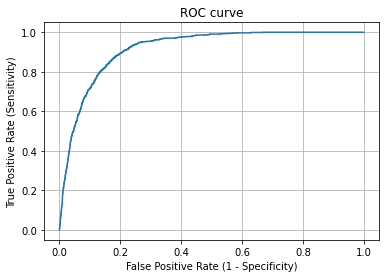

In [103]:
plt.plot(fpr_lr,tpr_lr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [104]:
roc_auc_score(ytest_num,probLR)

0.9166175745596976

### Naive Bayes' classifier

In [105]:
probNB=gnb.predict_proba(test_num)[:,1]

In [106]:
fpr_nb,tpr_nb, thresholds = roc_curve(ytest_num,probNB)

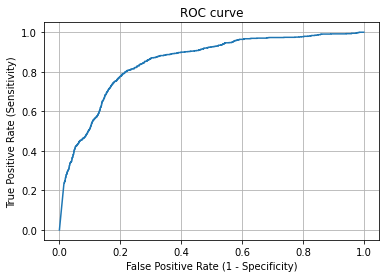

In [107]:
plt.plot(fpr_nb, tpr_nb)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [108]:
roc_auc_score(ytest_num,probNB)

0.8509542431410506

# KNN

In [109]:
probKNN=knn.predict_proba(test_num)[:,1]
probKNN

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
print(metrics.accuracy_score(ytest_num, pred_knn)*100)
print(confusion_matrix(ytest_num, pred_knn))
print(classification_report(ytest_num, pred_knn))
fpr_knn,tpr_knn, thresholds = roc_curve(ytest_num,probKNN)
print(fpr_knn)
print(tpr_knn)
print(thresholds)



89.45132313668365
[[7000  264]
 [ 605  369]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7264
           1       0.58      0.38      0.46       974

    accuracy                           0.89      8238
   macro avg       0.75      0.67      0.70      8238
weighted avg       0.88      0.89      0.88      8238

[0.         0.00412996 0.01459251 0.03634361 0.07970815 0.17263216
 1.        ]
[0.         0.06673511 0.21355236 0.3788501  0.58521561 0.81314168
 1.        ]
[2.  1.  0.8 0.6 0.4 0.2 0. ]


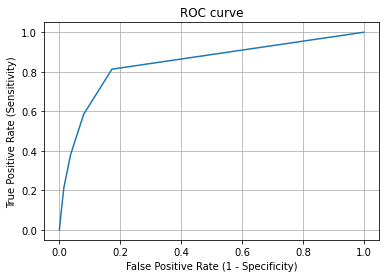

In [111]:
plt.plot(fpr_knn, tpr_knn)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [112]:
roc_auc_score(ytest_num,probKNN)

0.8439879459560918

# SVM

In [113]:
probSVM=svm.predict_proba(test_num)[:,1]
probSVM

array([0.07587608, 0.07599926, 0.06984159, ..., 0.07726989, 0.07710141,
       0.06935716])

In [114]:
print(metrics.accuracy_score(ytest_num, pred_svm)*100)
print(confusion_matrix(ytest_num, pred_svm))
print(classification_report(ytest_num, pred_svm))
fpr_svm,tpr_svm, thresholds = roc_curve(ytest_num,probSVM)

90.15537751881524
[[7128  136]
 [ 675  299]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7264
           1       0.69      0.31      0.42       974

    accuracy                           0.90      8238
   macro avg       0.80      0.64      0.69      8238
weighted avg       0.89      0.90      0.88      8238



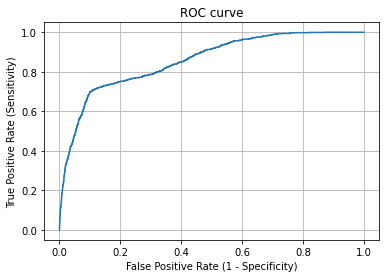

In [115]:
plt.plot(fpr_svm, tpr_svm)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [116]:
roc_auc_score(ytest_num,probSVM)

0.8567377362074736

# SVM with Kernel

In [117]:
probSVMKernel=svm_kernel.predict_proba(test_num)[:,1]
probSVMKernel

array([0.09567809, 0.09365   , 0.07487984, ..., 0.11586525, 0.11283223,
       0.07298015])

In [118]:
print(metrics.accuracy_score(ytest_num, pred_svm_kernel)*100)
print(confusion_matrix(ytest_num, pred_svm_kernel))
print(classification_report(ytest_num, pred_svm_kernel))
fpr_svm_kernel,tpr_svm_kernel, thresholds = roc_curve(ytest_num,probSVMKernel)

89.63340616654529
[[7205   59]
 [ 795  179]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7264
           1       0.75      0.18      0.30       974

    accuracy                           0.90      8238
   macro avg       0.83      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



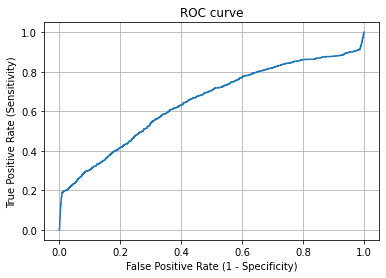

In [119]:
plt.plot(fpr_svm_kernel, tpr_svm_kernel)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [120]:
roc_auc_score(ytest_num,probSVMKernel)

0.6478233775294213

### Decision Tree classifier

In [121]:
probDT=dtclf.predict_proba(test_num)[:,1]
probDT

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
fpr_dt,tpr_dt, thresholds = roc_curve(ytest_num,probDT)

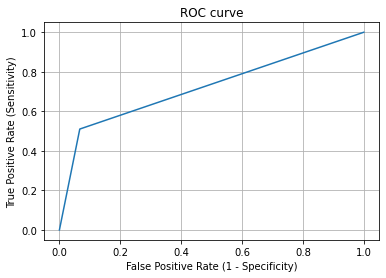

In [123]:
plt.plot(fpr_dt,tpr_dt)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [124]:
roc_auc_score(ytest_num,probDT)

0.7216808270540666

## Comparison of all models on Test Data

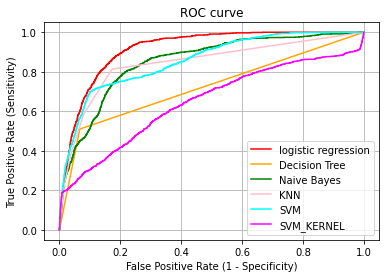

In [125]:
plt.plot(fpr_lr,tpr_lr,color='red',label='logistic regression') #lr
plt.plot(fpr_dt,tpr_dt,color='orange',label='Decision Tree') #DT
plt.plot(fpr_nb,tpr_nb,color='green',label='Naive Bayes') #naivebayes
plt.plot(fpr_knn,tpr_knn,color='pink',label='KNN') #knn
plt.plot(fpr_svm,tpr_svm,color='cyan',label='SVM') #SVM
plt.plot(fpr_svm_kernel,tpr_svm_kernel,color='magenta',label='SVM_KERNEL') #SVM Kernel



plt.legend(loc='lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#KNN


Computing cross-validated metrics

In [126]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
X_new = train_num.iloc[:,:-1]
Y_new = train_num.iloc[:,-1:]
kf=KFold(n_splits=10)
scoreLR=cross_val_score(modelLR,X_new,Y_new,cv=kf)
print("Cross Validation Scores for Logistic Regressions are {}".format(scoreLR))
print("Average Cross Validation score for Logistic Regression :{}".format(scoreLR.mean()))

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Cross Validation Scores for Logistic Regressions are [0.8983308  0.90136571 0.90197269 0.9168437  0.90895296 0.91168437
 0.90288316 0.9047041  0.91168437 0.90682853]
Average Cross Validation score for Logistic Regression :0.9065250379362672


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
scoreDT=cross_val_score(dtclf,X_new,Y_new,cv=kf)
print("Cross Validation Scores for Decision Tree are {}".format(scoreDT))
print("Average Cross Validation score for Decision Tree :{}".format(scoreDT.mean()))

scoreGNB=cross_val_score(gnb,X_new,Y_new,cv=kf)
print("Cross Validation Scores for Naive Bayes are {}".format(scoreGNB))
print("Average Cross Validation score for Naive Bayes :{}".format(scoreGNB.mean()))


scoreKNN=cross_val_score(knn,X_new,Y_new,cv=kf)
print("Cross Validation Scores for KNN are {}".format(scoreKNN))
print("Average Cross Validation score for KNN :{}".format(scoreKNN.mean()))


scoreSVM=cross_val_score(svm,X_new,Y_new,cv=kf)
print("Cross Validation Scores for SVM are {}".format(scoreSVM))
print("Average Cross Validation score for  SVM :{}".format(scoreSVM.mean()))


scoreSVMK=cross_val_score(svm_kernel,X_new,Y_new,cv=kf)
print("Cross Validation Scores for SVM with Kernel are {}".format(scoreSVMK))
print("Average Cross Validation score for SVM with Kernel :{}".format(scoreSVMK.mean()))




Cross Validation Scores for Decision Tree are [0.88497724 0.88497724 0.88376328 0.8952959  0.88133536 0.89650986
 0.89347496 0.88345979 0.88770865 0.89286798]
Average Cross Validation score for Decision Tree :0.8884370257966616


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Cross Validation Scores for Naive Bayes are [0.85280728 0.85948407 0.84552352 0.8585736  0.85280728 0.85978756
 0.84734446 0.85037936 0.87101669 0.84886191]
Average Cross Validation score for Naive Bayes :0.8546585735963582


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

Cross Validation Scores for KNN are [0.89438543 0.89893778 0.90197269 0.91532625 0.90379363 0.90622155
 0.90106222 0.89863429 0.90440061 0.90743551]
Average Cross Validation score for KNN :0.903216995447648


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Cross Validation Scores for SVM are [0.89559939 0.90015175 0.90015175 0.9168437  0.90864947 0.90955994
 0.9016692  0.90409712 0.91047041 0.90440061]
Average Cross Validation score for  SVM :0.9051593323216997


C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Cross Validation Scores for SVM with Kernel are [0.8952959  0.89620637 0.8983308  0.91198786 0.90349014 0.90318665
 0.8983308  0.90379363 0.90379363 0.90349014]
Average Cross Validation score for SVM with Kernel :0.9017905918057663
